# Analyse Exploratoire du fichier myreport2016_cpu.csv

### Imports (fichier & modules)

In [17]:
import pandas as pda
import matplotlib.pyplot as plt
import numpy as np
#import os
#print(os.getcwd())
#print(os.listdir('241016_LogETL'))

In [18]:
tab = pda.read_csv('../data/logServer/myreport2016_cpu.csv',sep=',')

### Le fichier myreport2016_cpu.csv

In [19]:
print("il y a ",tab.shape[0]," lignes et ",tab.shape[1]," colonnes dans le data frame")

il y a  2162  lignes et  24  colonnes dans le data frame


In [20]:
tab.columns

Index(['Date et heure', 'Date et heure(RAW)', 'Somme', 'Somme(RAW)',
       'Processeur 1', 'Processeur 1(RAW)', 'Processeur 2',
       'Processeur 2(RAW)', 'Processeur 3', 'Processeur 3(RAW)',
       'Processeur 4', 'Processeur 4(RAW)', 'Processeur 5',
       'Processeur 5(RAW)', 'Processeur 6', 'Processeur 6(RAW)',
       'Processeur 7', 'Processeur 7(RAW)', 'Processeur 8',
       'Processeur 8(RAW)', 'Temps mort', 'Temps mort(RAW)', 'Couverture',
       'Couverture(RAW)'],
      dtype='object')

In [21]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2162 entries, 0 to 2161
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date et heure       2162 non-null   object 
 1   Date et heure(RAW)  2161 non-null   float64
 2   Somme               1476 non-null   object 
 3   Somme(RAW)          1475 non-null   float64
 4   Processeur 1        812 non-null    object 
 5   Processeur 1(RAW)   1475 non-null   float64
 6   Processeur 2        993 non-null    object 
 7   Processeur 2(RAW)   1475 non-null   float64
 8   Processeur 3        1230 non-null   object 
 9   Processeur 3(RAW)   1475 non-null   float64
 10  Processeur 4        1031 non-null   object 
 11  Processeur 4(RAW)   1475 non-null   float64
 12  Processeur 5        976 non-null    object 
 13  Processeur 5(RAW)   1475 non-null   float64
 14  Processeur 6        1054 non-null   object 
 15  Processeur 6(RAW)   1475 non-null   float64
 16  Proces

In [22]:
# Calculer le nombre de valeurs uniques pour chaque colonne
nb_valeurs_uniques = tab.nunique()

# Afficher les résultats
print(nb_valeurs_uniques)

Date et heure         2162
Date et heure(RAW)    2161
Somme                  404
Somme(RAW)             875
Processeur 1            30
Processeur 1(RAW)      699
Processeur 2            61
Processeur 2(RAW)      888
Processeur 3            72
Processeur 3(RAW)     1008
Processeur 4            60
Processeur 4(RAW)      907
Processeur 5            62
Processeur 5(RAW)      858
Processeur 6            63
Processeur 6(RAW)      908
Processeur 7            60
Processeur 7(RAW)      907
Processeur 8            52
Processeur 8(RAW)      804
Temps mort              13
Temps mort(RAW)         25
Couverture               5
Couverture(RAW)          4
dtype: int64


In [23]:
tab.head()


,Date et heure,Date et heure(RAW),Somme,Somme(RAW),Processeur 1,Processeur 1(RAW),Processeur 2,Processeur 2(RAW),Processeur 3,Processeur 3(RAW),...,Processeur 6,Processeur 6(RAW),Processeur 7,Processeur 7(RAW),Processeur 8,Processeur 8(RAW),Temps mort,Temps mort(RAW),Couverture,Couverture(RAW)
0,12/09/2024 00:00:00 - 01:00:00,45546.958333,18 %,17.5833,11 %,10.5833,14 %,13.5833,20 %,19.6667,...,14 %,14.2500,37 %,37.2500,15 %,14.5833,0 %,0.0,40 %,4000.0
1,12/09/2024 01:00:00 - 02:00:00,45547.000000,24 %,24.4167,6 %,5.5000,20 %,19.5833,61 %,60.5833,...,14 %,14.0833,42 %,42.3333,14 %,14.0000,0 %,0.0,40 %,4000.0
2,12/09/2024 02:00:00 - 03:00:00,45547.041667,17 %,17.0000,9 %,8.7500,15 %,15.0000,54 %,53.6667,...,7 %,6.9167,16 %,16.1667,8 %,7.8333,0 %,0.0,40 %,4000.0
3,12/09/2024 03:00:00 - 04:00:00,45547.083333,11 %,10.5833,5 %,5.0833,8 %,8.5000,23 %,22.8333,...,12 %,11.8333,8 %,8.1667,8 %,8.1667,0 %,0.0,40 %,4000.0
4,12/09/2024 04:00:00 - 05:00:00,45547.125000,"3,42 %",3.4167,2 %,2.3333,4 %,4.1667,4 %,4.4167,...,2 %,2.3333,5 %,4.9167,3 %,2.6667,0 %,0.0,40 %,4000.0


## Analyse temporelle

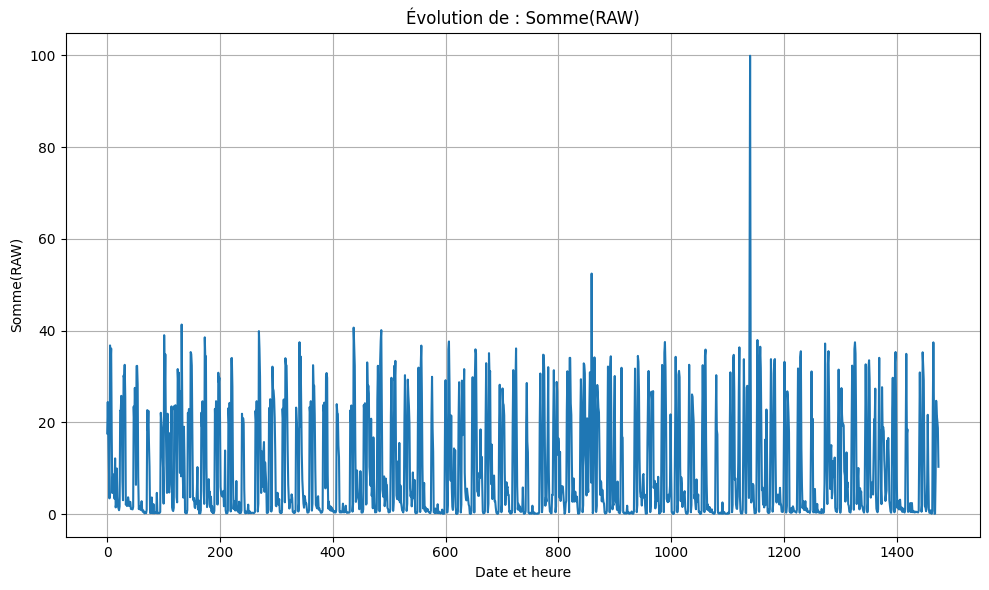

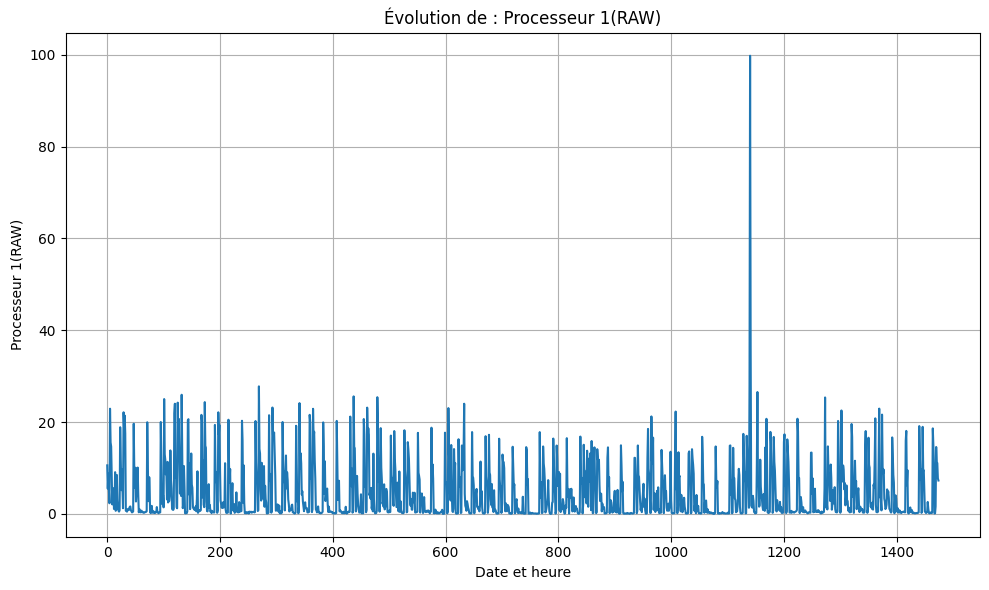

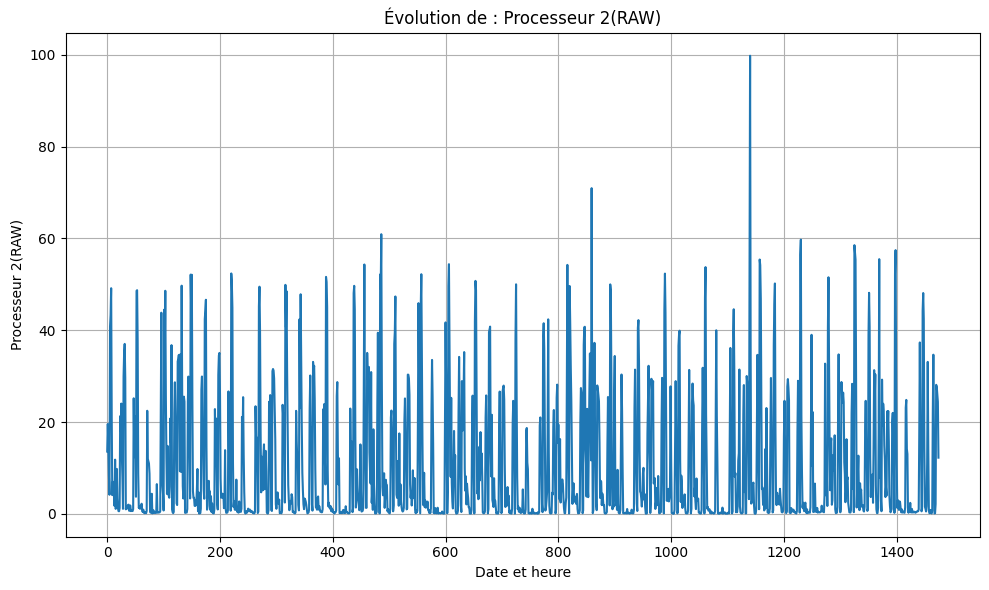

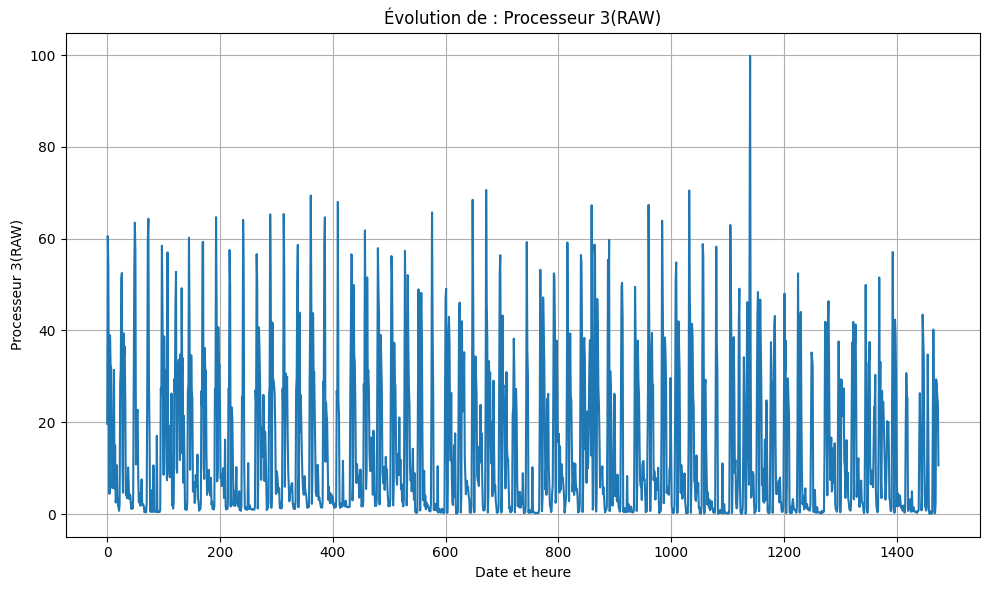

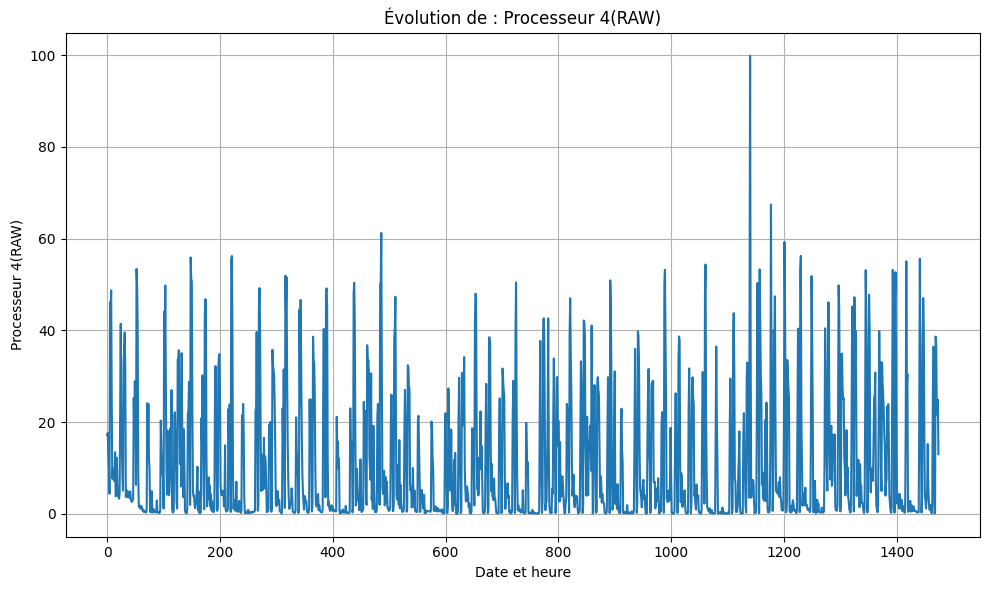

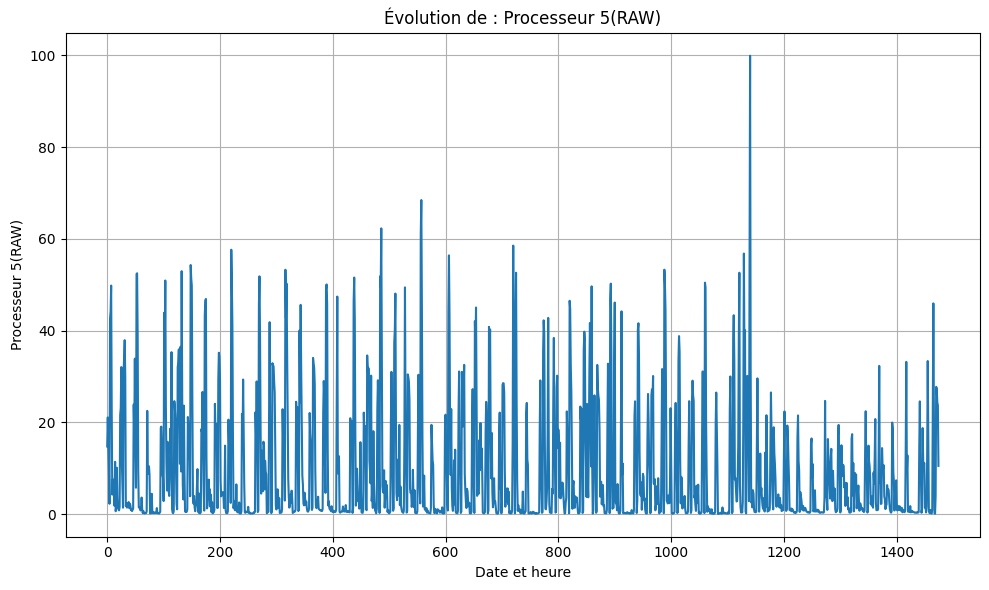

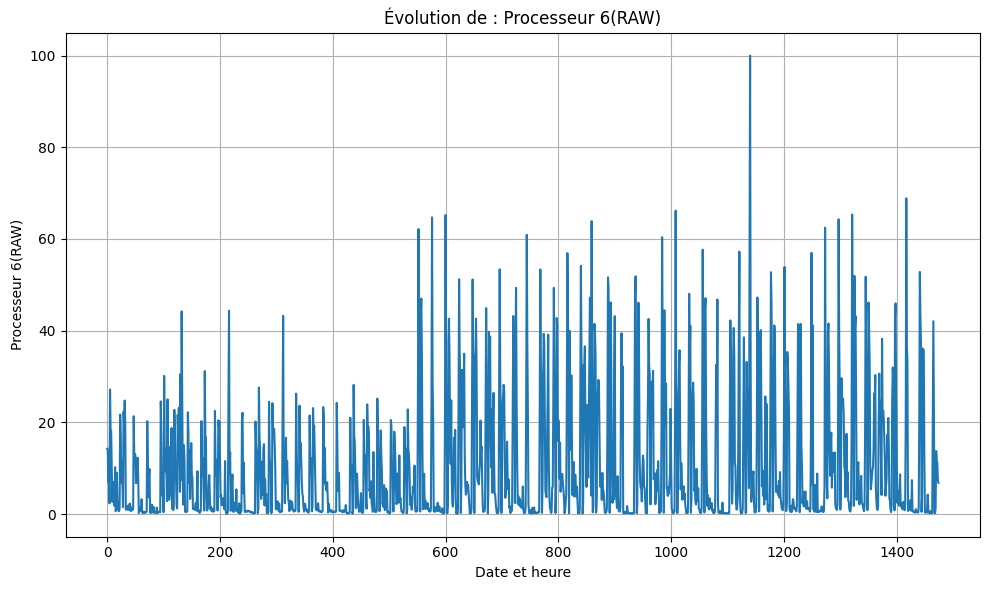

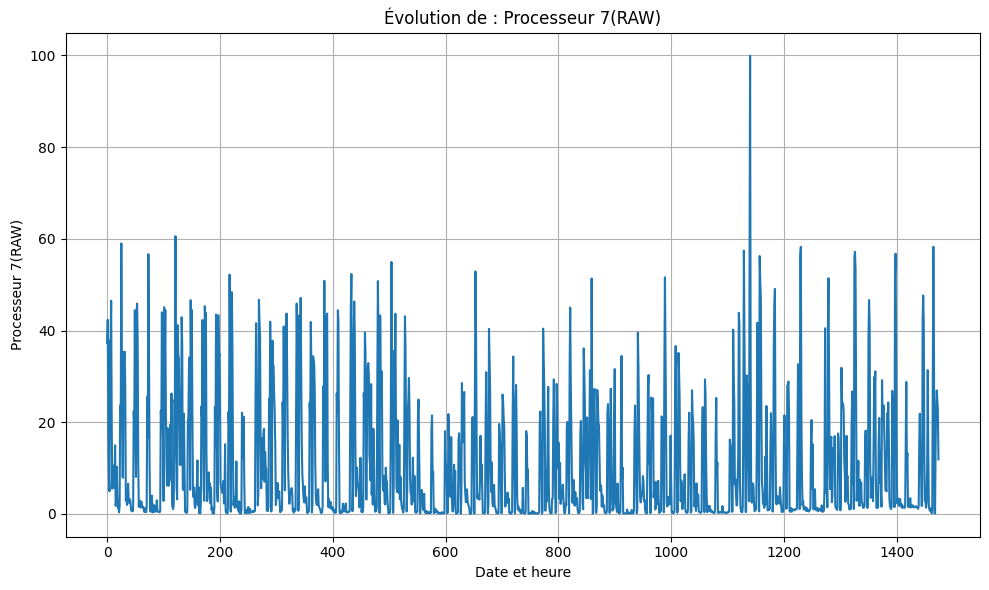

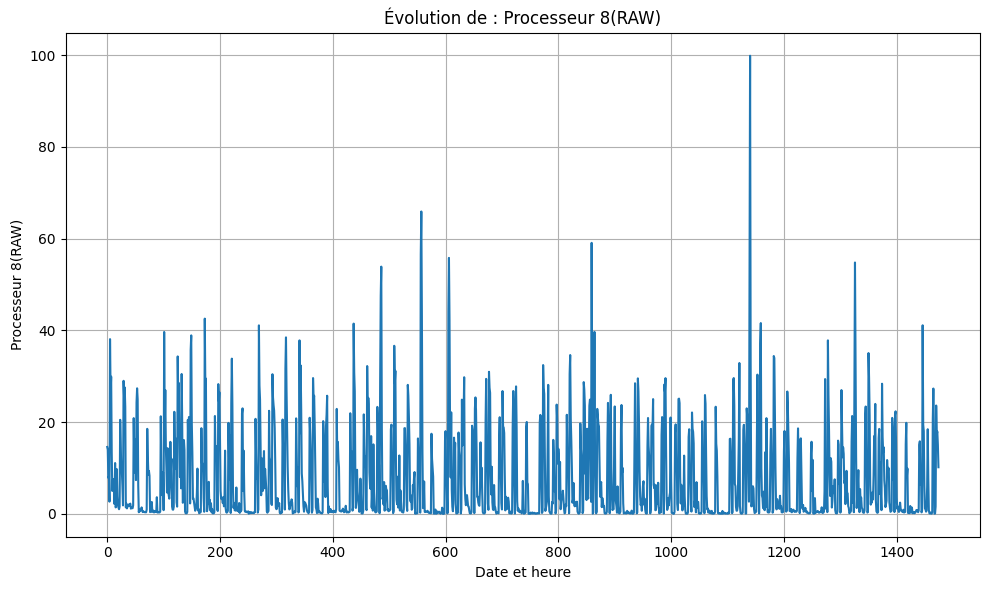

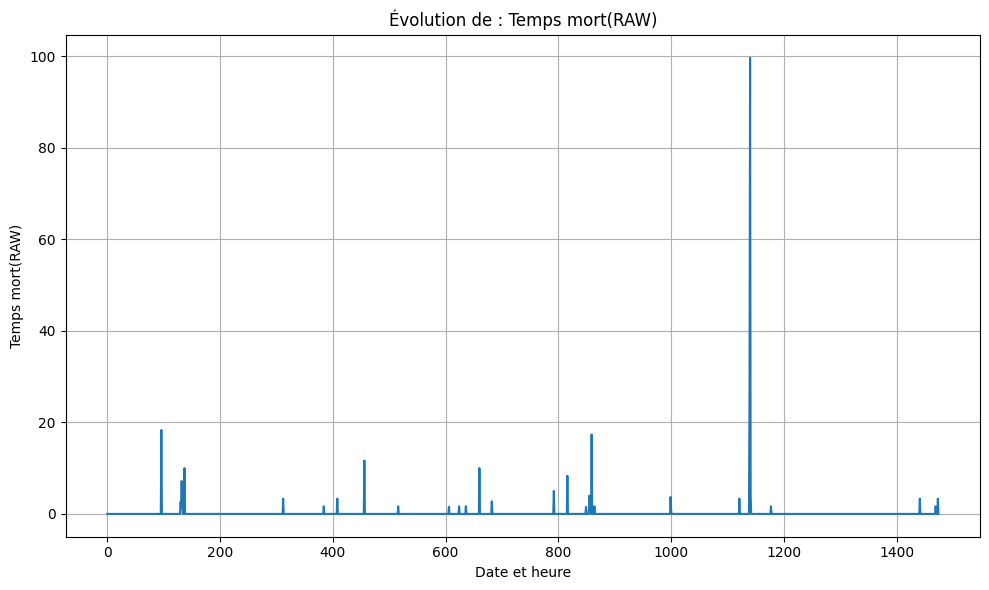

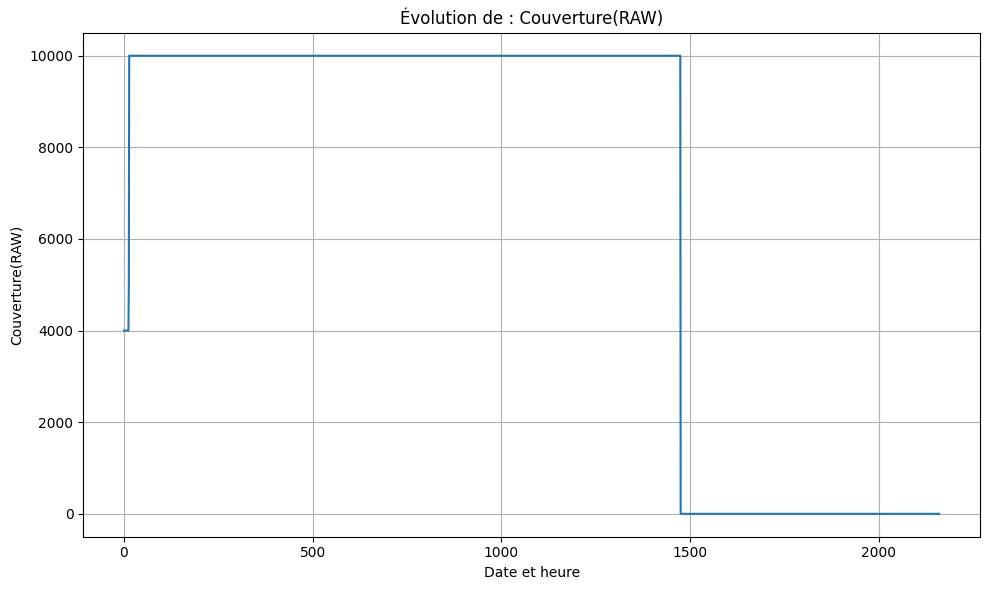

In [24]:
df=tab.copy()

# Boucle pour générer les graphiques
for col in df.columns:
    if col != 'Date et heure(RAW)' and "RAW" in col:  # Exclure la colonne 'Date et heure(RAW)'
        plt.figure(figsize=(10, 6))
        df[col].plot(kind='line', title=f'Évolution de : {col}')
        plt.xlabel('Date et heure')
        plt.ylabel(col)
        plt.grid(True)
        plt.tight_layout()
        plt.show()